# Peaks2MapsKernel demo

In [1]:
import json, nimare
import pandas as pd
from nilearn.plotting import plot_glass_brain

C:\Users\me\Miniconda3\lib\site-packages\duecredit\io.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import defaultdict, Iterator
C:\Users\me\Miniconda3\lib\site-packages\socks.py:58: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable
C:\Users\me\Miniconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\me\Miniconda3\lib\site-packages\tensorflow\python\util\nest.py:823: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  _pywrap_tensorflow.RegisterType("Sequence", _collections.Sequence)
C:\Users\me\Miniconda3\li

## Preparing example Dataset

In [2]:
dset_dict = {}
coords_df = pd.read_csv('coordinates.csv')
for i, row in pd.read_csv('studies.csv').iterrows():
    this_study_coords = coords_df[coords_df['study_id'] == row[0]]
    contrast = {"sample_sizes": [row[1]],
                "coords": { "space": this_study_coords['space'].unique()[0],
                            "x": list(this_study_coords['x']),
                            "y": list(this_study_coords['y']),
                            "z": list(this_study_coords['z'])}}
    dset_dict[row[0]] = {"contrasts": {"1": contrast }}
with open("tmp.json", 'w') as fp:
    json.dump(dset_dict, fp)

In [3]:
db = nimare.dataset.Database("tmp.json")
dset = db.get_dataset()
mask_img = dset.mask

## Transforming from peak coordinates to maps using peaks2maps model

In [4]:
k = nimare.meta.cbma.kernel.Peaks2MapsKernel(dset.coordinates, mask=dset.mask)
imgs = k.transform(ids=dset.ids, masked=True)

C:\Users\me\AppData\Local\neurostuff\nimare\1.0\ohbm2018_model



Uncompressing the model to C:\Users\me\AppData\Local\neurostuff\nimare\1.0\ohbm2018_model...
begin inference


C:\Users\me\Miniconda3\lib\site-packages\tensorflow\python\util\tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


## Plotting the results

C:\Users\me\Miniconda3\lib\site-packages\scipy\ndimage\measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
C:\Users\me\Miniconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


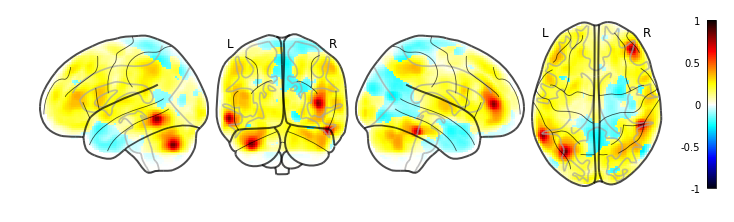

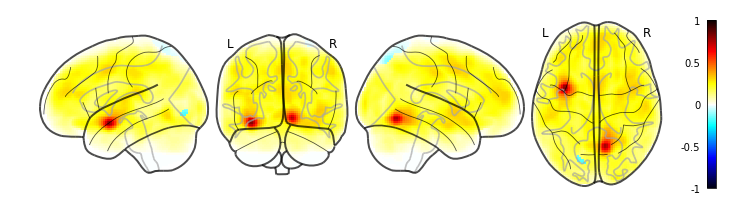

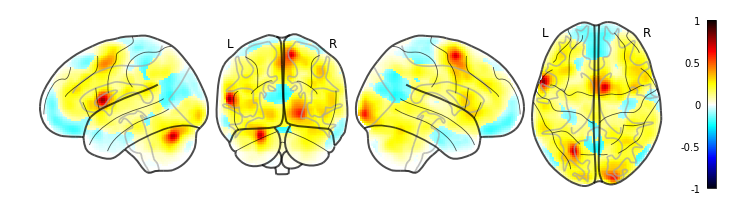

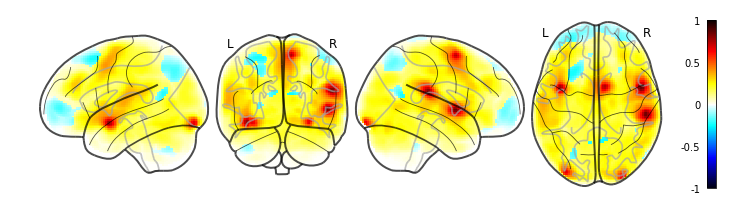

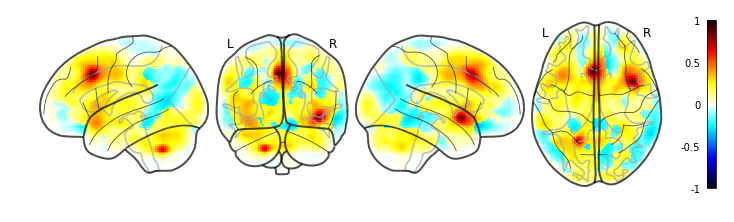

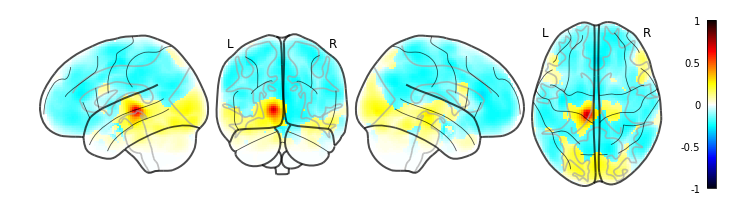

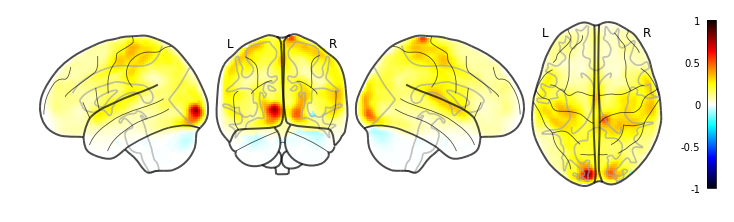

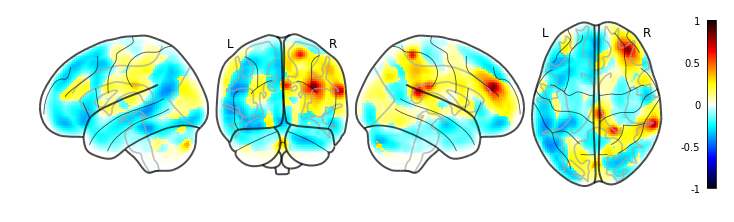

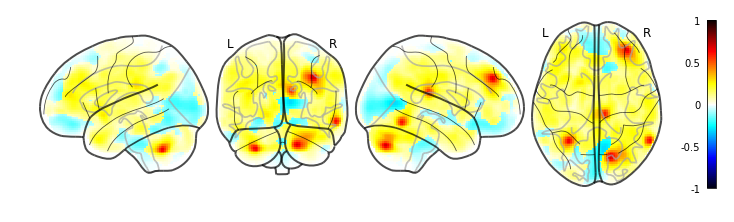

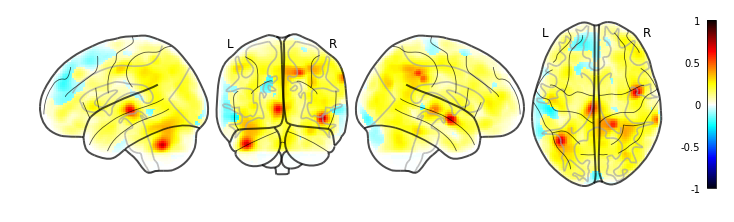

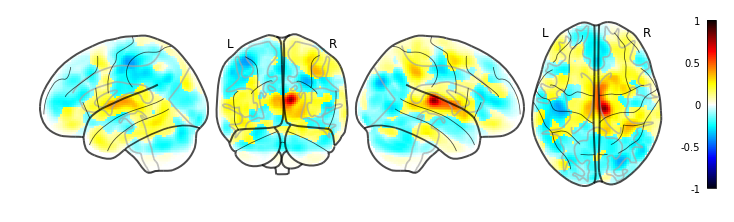

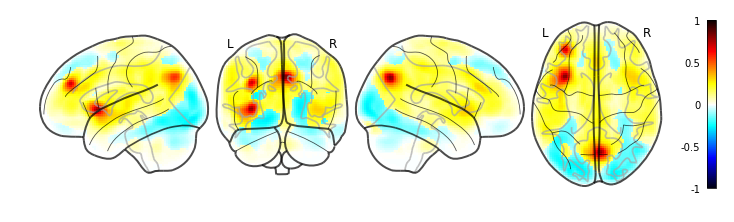

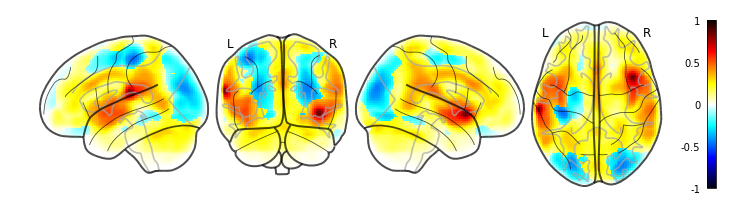

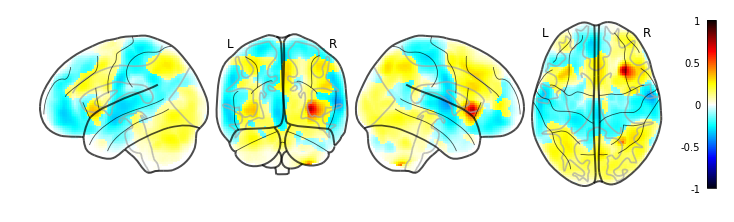

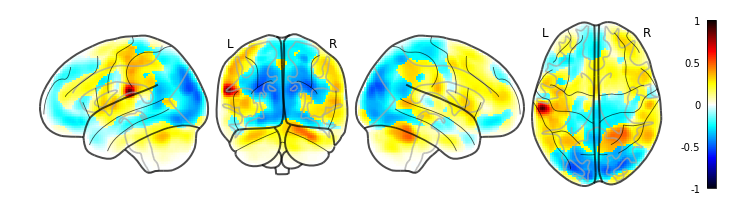

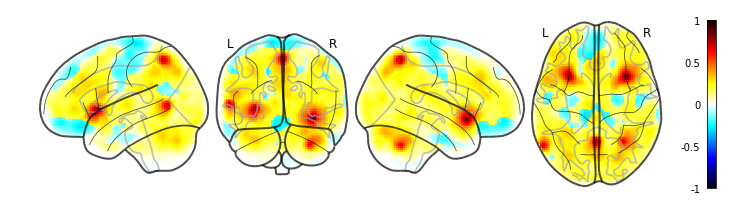

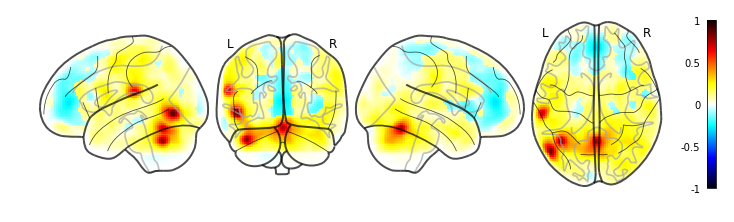

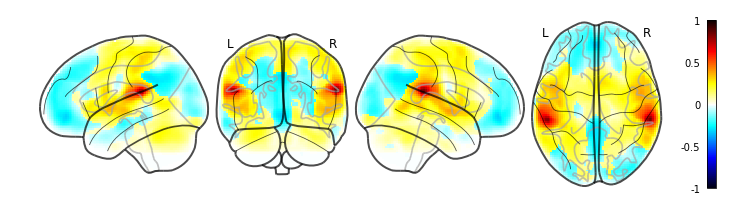

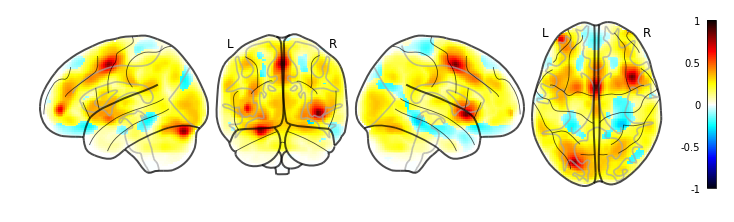

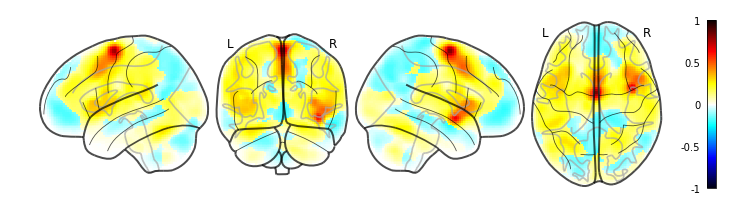

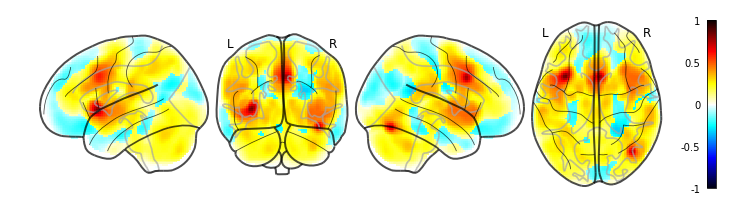

In [5]:
for img in imgs:
    display = plot_glass_brain(img, display_mode='lyrz', plot_abs=False, colorbar=True, vmax=1, threshold=0)